In [1]:
import pickle
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

In [5]:
os.getcwd()
os.chdir("../data/DataFrames")
os.getcwd()

df_lst = []

for file in glob.glob("ee*.json.df"):
    print("Processing :" + file)

    with open(file, 'rb') as handle:
        ldf = pd.read_pickle(handle)
        df_lst.append(ldf)

print(len(df_lst))

Processing :ee-test-for-ml-lammps-128+128.3755465.104.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.102.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.108.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.10.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.113.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.101.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.110.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.114.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.103.json.df
Processing :ee-test-for-ml-lammps-128+32.3755463.110.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.105.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.107.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.109.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.106.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.112.json.df
Processing :ee-test-for-ml-lammps-128+128.3755465.111.json.df
Processing

In [6]:
len(df_lst)

21

In [7]:
df = pd.concat(df_lst)

In [10]:
df.columns

Index(['kl', 'time_by_lasttime', 'time_diff', 'node_id', 'thread_id'], dtype='object')

In [8]:
df.shape

(3623214, 5)

In [11]:
df = df.sort_values(['time_by_lasttime'], ascending=[True])

In [86]:
import pandas as pd
sf = df.kl.value_counts()
freq = pd.DataFrame({'n_gram':sf.index, 'numberofcalls':sf.values})

# Define max and min threshold
min = 10000
max = float("inf")

subset = freq[(freq['numberofcalls'] > min) & (freq['numberofcalls'] < max)]
subset = subset.sample(frac=0.4)
subset

,n_gram,numberofcalls
0,"voidLAMMPS_NS::Run::command(int,char**):voidLA...",319405
11,"voidLAMMPS_NS::Run::command(int,char**):voidLA...",163548
14,"voidLAMMPS_NS::Run::command(int,char**):voidLA...",22680
6,voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS:...,166320
13,LAMMPS_NS::Input::command_creator:voidLAMMPS_N...,60816
9,"voidLAMMPS_NS::Run::command(int,char**):voidLA...",166320
16,voidLAMMPS_NS::Modify::initial_integrate(int):...,15120
4,voidLAMMPS_NS::Verlet::run(int):voidLAMMPS_NS:...,318649


In [96]:
def perform_iforest(df):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.ensemble import IsolationForest
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(15.5, 10.5)
    
    f_name = df.iloc[0]['kl']    
    
    clf = IsolationForest()
    clf.fit(df[['time_by_lasttime','time_diff']])
    y_pred = clf.predict(df[['time_by_lasttime','time_diff']])
    
    minx=df['time_by_lasttime'].min()
    maxx=df['time_by_lasttime'].max()
    miny=df['time_diff'].min()
    maxy=df['time_diff'].max()
    
    plt.title("Isolation Forest")
    
    turop = clf.decision_function(df[['time_by_lasttime','time_diff']])
    
    # plot outliers in red and normals in green
    
    # Method 1
    df_outliers = df.iloc[turop.argsort()[:int(len(turop)/100)]]
    df_normals  = df.iloc[turop.argsort()[int(len(turop)/100):]]
    
    # Method 2
    #df_outliers = df[ y_pred ==-1 ]
    #df_normals = df[ y_pred ==+1 ]
    
    g = plt.scatter(df_normals['time_by_lasttime'],  df_normals['time_diff'], c='green', s=65, edgecolor='k')
    h = plt.scatter(df_outliers['time_by_lasttime'], df_outliers['time_diff'], c='red', s=65, edgecolor='k')
    
    plt.axis('tight')
    plt.xlim((minx, maxx))
    plt.ylim((miny, maxy))
    plt.legend([g, h],["Normal","Outliers"],loc="upper right")
    plt.show()

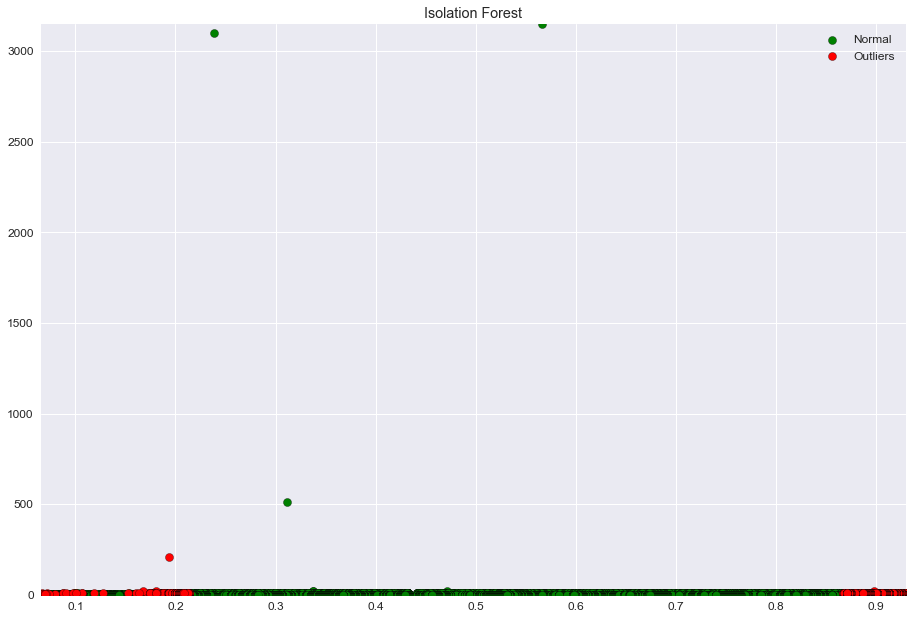

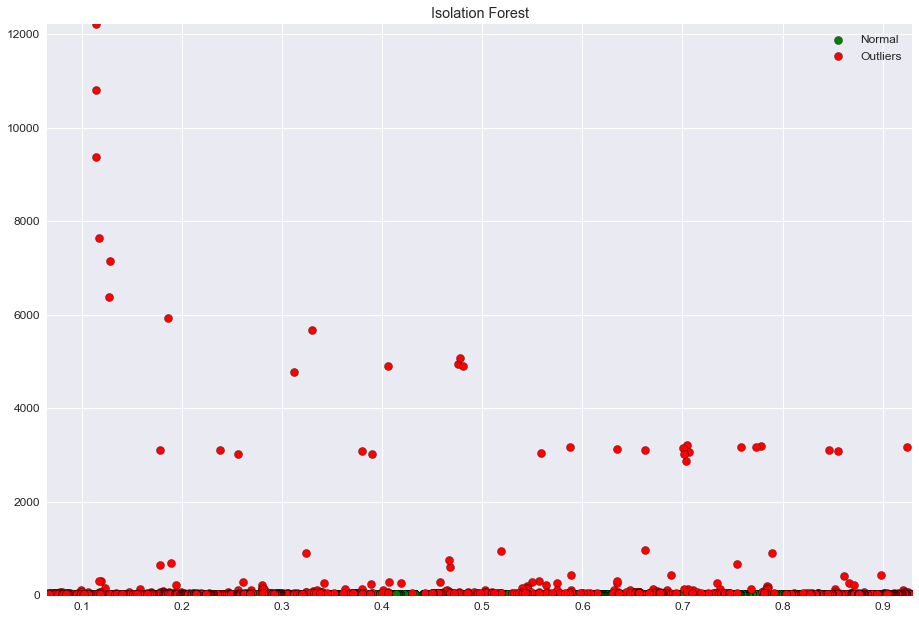

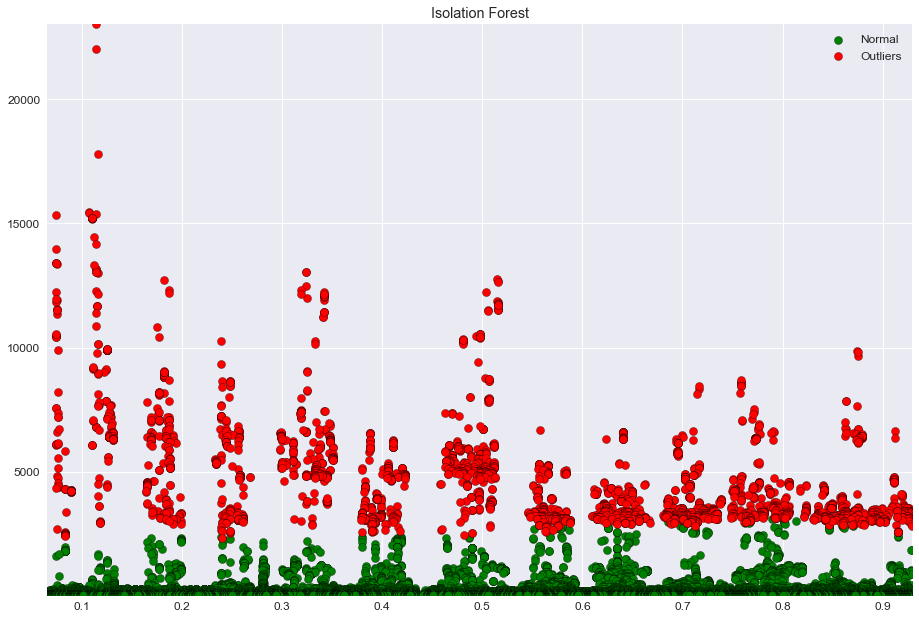

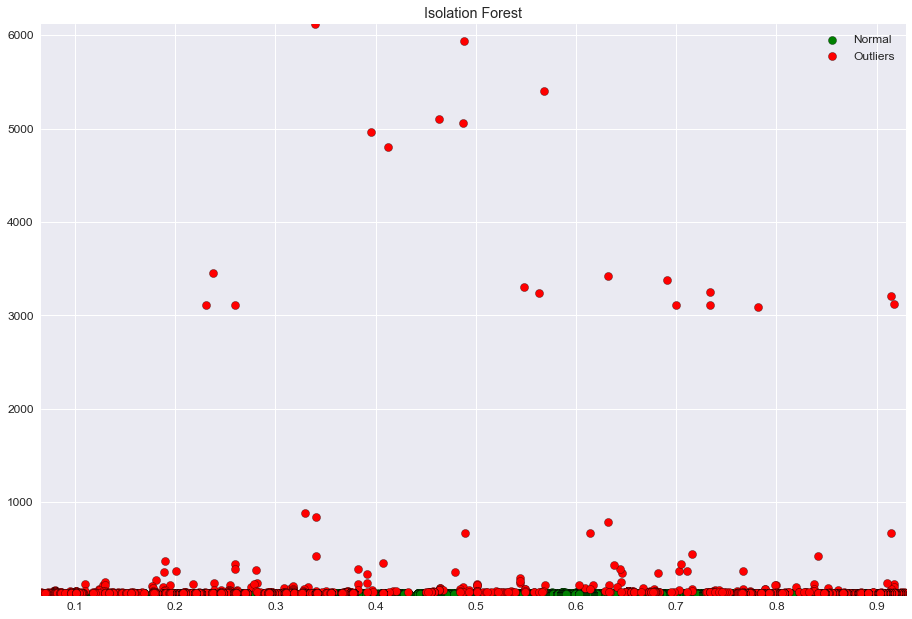

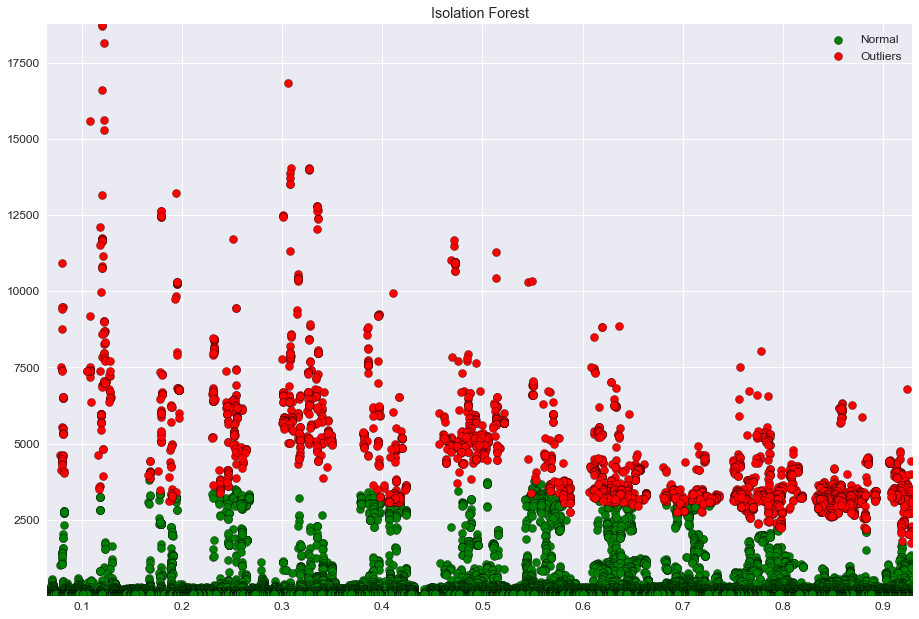

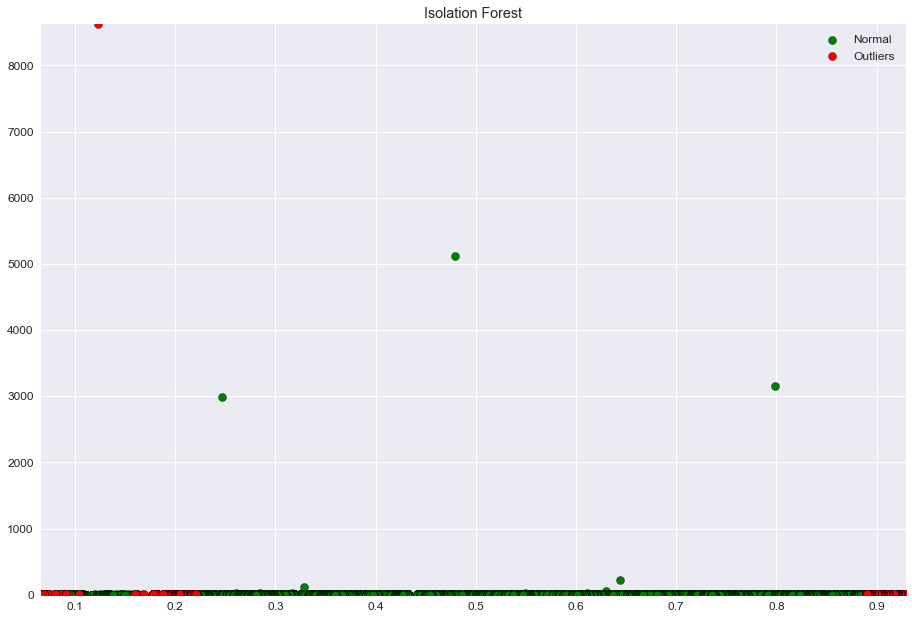

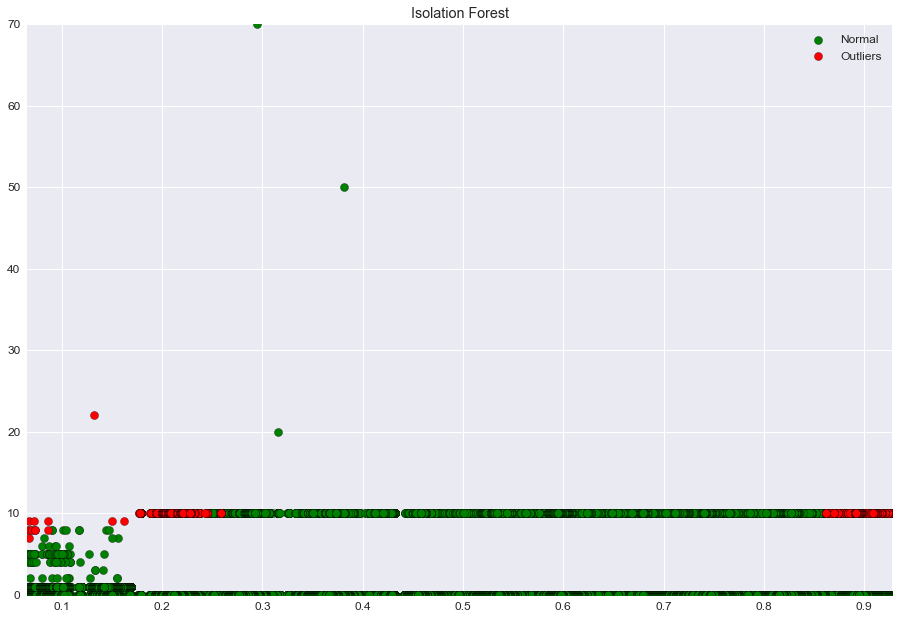

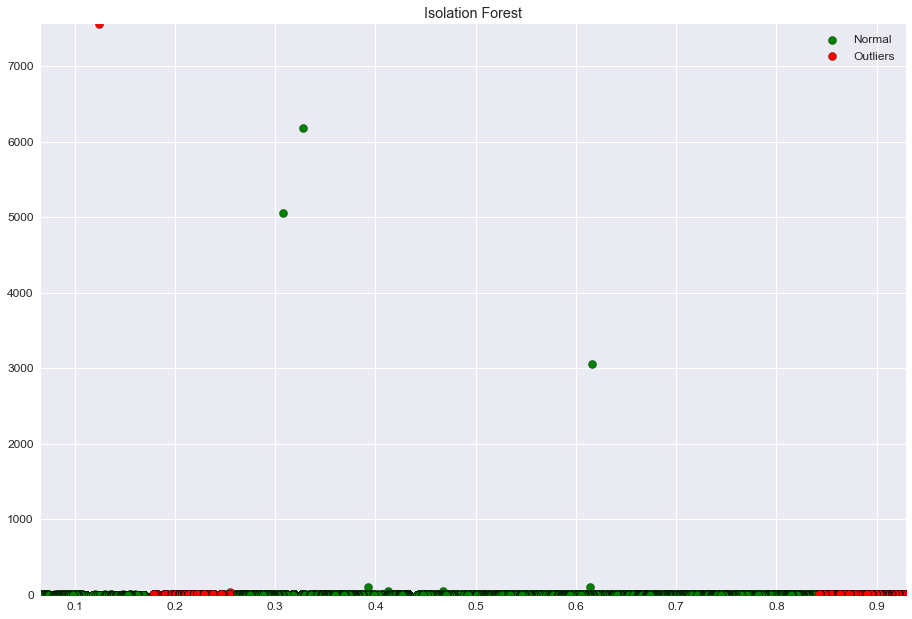

In [97]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

for i in range(len(subset)):
    pick_func = freq.iloc[i]['n_gram']
    count  = freq.iloc[i]['numberofcalls']
    lbl = str(pick_func) +'_count_'+ str(count)
    
    ##############
    # df[df['kl'] == pick_func].plot(x='time_by_lasttime', y='time_diff', kind = 'scatter', title=lbl )
    # plt.show()
    ##############
    
    perform_iforest(df[df['kl'] == pick_func])